<a href="https://colab.research.google.com/github/inuwamobarak/student-CGPA-predictor/blob/main/Student_Academic_Performance_Prediction_Using_Extra_Trees_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Dependencies(Libraries)

In [ ]:
# Importing Requirments
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [ ]:
# Reading Dataframe
df = pd.read_csv("C:/Users/Inuwa Mobarak A/Desktop/100and200_studentscores.csv")

In [ ]:
# Viewing First Rows
df.head()

,BIO 101,CHM 101,GST 101,GST 103,GST 203,MTH 101,PHY 101,STA 101,CSC 102,MTH 102,...,STA 203,CSC 202,CSC 204,CSC 206,CSC 208,PHY 202,MTH214,GST 204,GST 206,CGPA
0,48,40,51,67,56,52,47,30,50,46,...,0,0,0,63,54,28,45,54,53,2.05
1,57,40,54,83,47,65,30,46,47,51,...,33,50,64,72,77,54,46,47,60,3.41
2,63,30,51,79,64,47,68,41,51,45,...,0,0,0,54,54,32,22,37,45,2.69
3,47,20,31,73,50,53,31,29,37,31,...,0,0,0,0,0,0,0,22,51,2.52
4,57,40,54,83,47,65,30,46,47,51,...,33,50,64,72,77,54,46,47,60,3.41


# Data Understanding

In [ ]:
# Dataset Size
df.shape

(123, 31)

In [ ]:
# Statistical Detail
df.describe()

,BIO 101,CHM 101,GST 101,GST 103,GST 203,MTH 101,PHY 101,STA 101,CSC 102,MTH 102,...,STA 203,CSC 202,CSC 204,CSC 206,CSC 208,PHY 202,MTH214,GST 204,GST 206,CGPA
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.00000,123.000000,123.000000,123.00000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,62.097561,46.170732,53.146341,70.300813,56.829268,59.365854,50.536585,53.032520,59.504065,53.626016,...,28.99187,46.658537,49.292683,48.95935,56.504065,33.439024,35.235772,36.284553,41.105691,3.166992
std,10.796489,16.176641,10.957207,9.726535,6.269504,19.147515,15.835886,16.366166,22.256100,21.497769,...,28.98657,28.883834,24.527580,28.75316,27.877770,25.902448,27.694493,25.407021,27.061803,0.957588
min,45.000000,20.000000,31.000000,34.000000,35.000000,0.000000,17.000000,24.000000,9.000000,8.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000
25%,54.000000,35.000000,47.000000,64.000000,51.000000,47.500000,45.000000,45.500000,45.000000,36.000000,...,0.00000,33.000000,39.000000,39.00000,51.000000,0.000000,0.000000,0.000000,0.000000,2.520000
50%,62.000000,45.000000,54.000000,70.000000,58.000000,56.000000,50.000000,53.000000,64.000000,53.000000,...,33.00000,51.000000,54.000000,54.00000,70.000000,35.000000,45.000000,49.000000,53.000000,3.020000
75%,70.000000,60.000000,60.000000,79.000000,62.000000,73.000000,63.000000,57.000000,78.000000,70.000000,...,50.00000,72.000000,64.000000,70.50000,73.000000,53.500000,52.500000,57.000000,58.000000,3.815000
max,85.000000,78.000000,76.000000,86.000000,69.000000,95.000000,83.000000,89.000000,93.000000,97.000000,...,89.00000,94.000000,86.000000,94.00000,87.000000,83.000000,81.000000,74.000000,78.000000,4.680000


In [ ]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BIO 101  123 non-null    int64  
 1   CHM 101  123 non-null    int64  
 2   GST 101  123 non-null    int64  
 3   GST 103  123 non-null    int64  
 4   GST 203  123 non-null    int64  
 5   MTH 101  123 non-null    int64  
 6   PHY 101  123 non-null    int64  
 7   STA 101  123 non-null    int64  
 8   CSC 102  123 non-null    int64  
 9   MTH 102  123 non-null    int64  
 10  CSC104   123 non-null    int64  
 11  PHY 102  123 non-null    int64  
 12  CHM 102  123 non-null    int64  
 13  GST 102  123 non-null    int64  
 14  STA 112  123 non-null    int64  
 15  CSC 201  123 non-null    int64  
 16  CSC 203  123 non-null    int64  
 17  CSC 205  123 non-null    int64  
 18  GST 201  123 non-null    int64  
 19  GST 301  123 non-null    int64  
 20  MTH 245  123 non-null    int64  
 21  STA 203  123 non

# Exploratory Data Analysis

<AxesSubplot:>

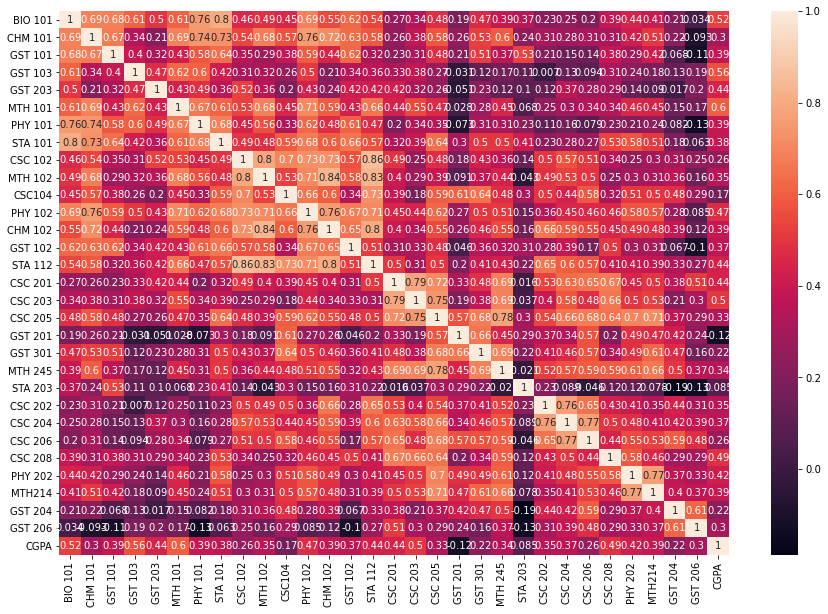

In [ ]:
# Data Heatmap for Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Model Development

In [ ]:
# Data Splitting
X = df.drop('CGPA',axis=1)
y = df['CGPA']

In [ ]:
# Evaluation metric
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Data Fitting
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X.head()

,BIO 101,CHM 101,GST 101,GST 103,GST 203,MTH 101,PHY 101,STA 101,CSC 102,MTH 102,...,MTH 245,STA 203,CSC 202,CSC 204,CSC 206,CSC 208,PHY 202,MTH214,GST 204,GST 206
0,-1.311095,-0.383020,-0.196685,-0.340750,-0.132811,-0.386263,-0.224241,-1.413081,-0.428778,-0.356186,...,-1.238071,-1.004274,-1.621993,-2.017904,0.490314,-0.090190,-0.210840,0.354011,0.700118,0.441322
1,-0.474081,-0.383020,0.078227,1.310963,-1.574203,0.295453,-1.302142,-0.431456,-0.564124,-0.122653,...,-0.592805,0.138841,0.116159,0.602076,0.804603,0.738214,0.797032,0.390267,0.423476,0.701047
2,0.083928,-1.003723,-0.196685,0.898035,1.148426,-0.648462,1.107285,-0.738214,-0.383663,-0.402893,...,-0.791348,-1.004274,-1.621993,-2.017904,0.176025,-0.090190,-0.055783,-0.479875,0.028275,0.144493
3,-1.404096,-1.624427,-2.029433,0.278643,-1.093739,-0.333823,-1.238736,-1.474433,-1.015277,-1.056787,...,-1.287707,-1.004274,-1.621993,-2.017904,-1.709711,-2.035140,-1.296240,-1.277506,-0.564528,0.367114
4,-0.474081,-0.383020,0.078227,1.310963,-1.574203,0.295453,-1.302142,-0.431456,-0.564124,-0.122653,...,-0.592805,0.138841,0.116159,0.602076,0.804603,0.738214,0.797032,0.390267,0.423476,0.701047


# Model Training

In [ ]:
# Training Assignment
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

## Using Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ETR = ExtraTreesRegressor()

In [ ]:
ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
print(ETR.score(X_test,y_test))

0.9262289075390224


In [ ]:
y_predETR = ETR.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predETR))
print('MSE:', metrics.mean_squared_error(y_test, y_predETR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predETR)))

MAE: 0.09710270270270525
MSE: 0.05063561567567561
RMSE: 0.22502358915383874


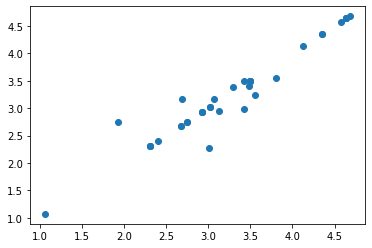

In [ ]:
plt.scatter(y_test,y_predETR)

## Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor()

In [ ]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print(RFR.score(X_test,y_test))

0.8872255072549213


In [ ]:
y_predRFR = RFR.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predRFR))
print('MSE:', metrics.mean_squared_error(y_test, y_predRFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

MAE: 0.1612297297297307
MSE: 0.0774070937837838
RMSE: 0.27822130361240094


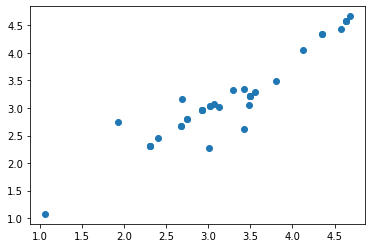

In [ ]:
plt.scatter(y_test,y_predRFR)

## Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(LR.score(X_test,y_test))

0.6526175634180571


In [ ]:
y_predLR = LR.predict(X_test)

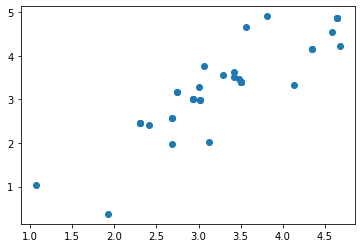

In [ ]:
plt.scatter(y_test,y_predLR)

## Using Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
R = Ridge()

In [ ]:
R.fit(X_train,y_train)

Ridge()

In [ ]:
print(R.score(X_test,y_test))

0.7403355080302838


In [ ]:
y_predR = R.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predR))
print('MSE:', metrics.mean_squared_error(y_test, y_predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predR)))

MAE: 0.28315576215933785
MSE: 0.1782306724948272
RMSE: 0.42217374680909187


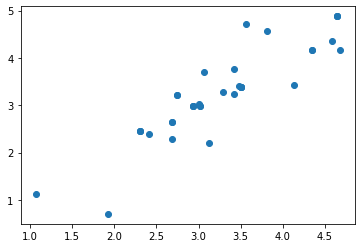

In [ ]:
plt.scatter(y_test,y_predR)

In [ ]:
import pickle
with open('Student_performance_model.pickle','wb') as f:
  pickle.dump(ETR,f)